In [4]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.graphics.api as smg
from scipy import stats
from matplotlib.patheffects import withStroke
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')
%matplotlib inline

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 1. nan]


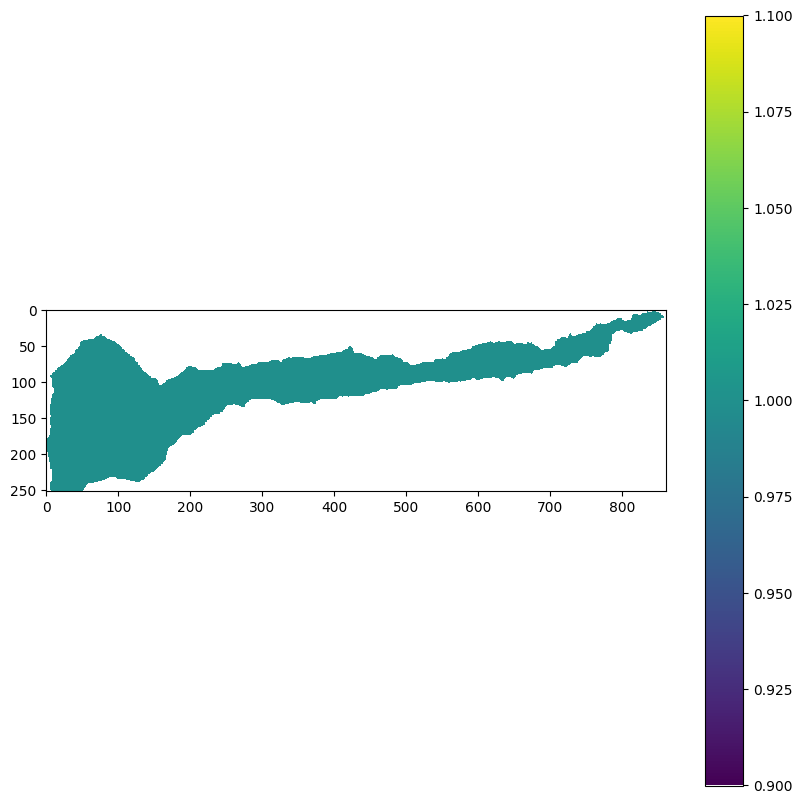

In [68]:
cuencaRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/Cuencacorte2.tif?raw=true')
cuencaB1 = cuencaRaster.read(1)

# Correción para organizar luego los otros valores
cuencaB1 = np.where(cuencaB1 == 255, np.nan, 1)

plt.figure(figsize=(10, 10))  # Ajusta el tamaño
plt.imshow(cuencaB1)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', cuencaB1.shape)
print('Valores únicos: ', np.unique(cuencaB1))

InventarioB1
Forma:  (252, 862)
Valores únicos:  [0 1]


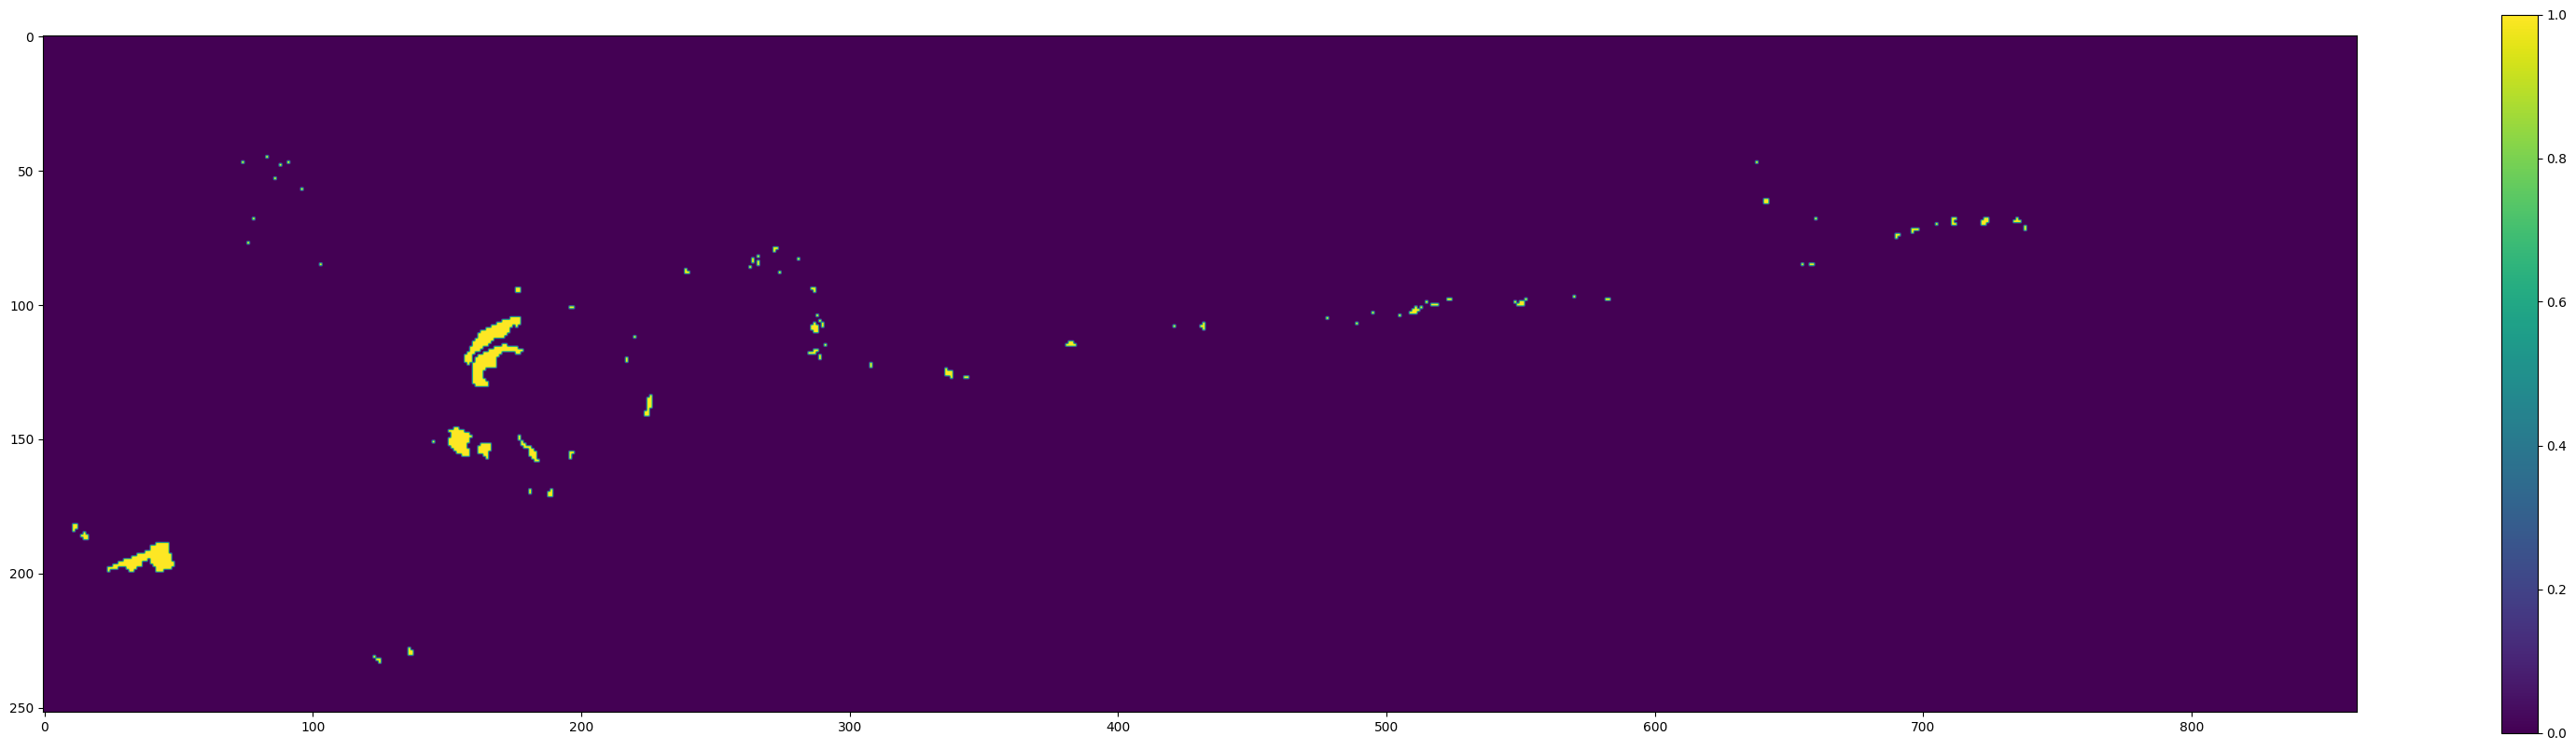

In [72]:
inventarioRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/InvetarioRas2.tif?raw=true')
inventarioB1 = inventarioRaster.read(1)

# Correción para organizar luego los otros valores
inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)
#inventarioB1 = np.where(inventarioB1 == 0, np.nan,  inventarioB1)
#inventarioB1 = np.where(inventarioB1 == 15, np.nan,  inventarioB1)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioB1)
plt.colorbar();

print('InventarioB1')
print('Forma: ', inventarioB1.shape)
print('Valores únicos: ', np.unique(inventarioB1))

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 0.  1. nan]


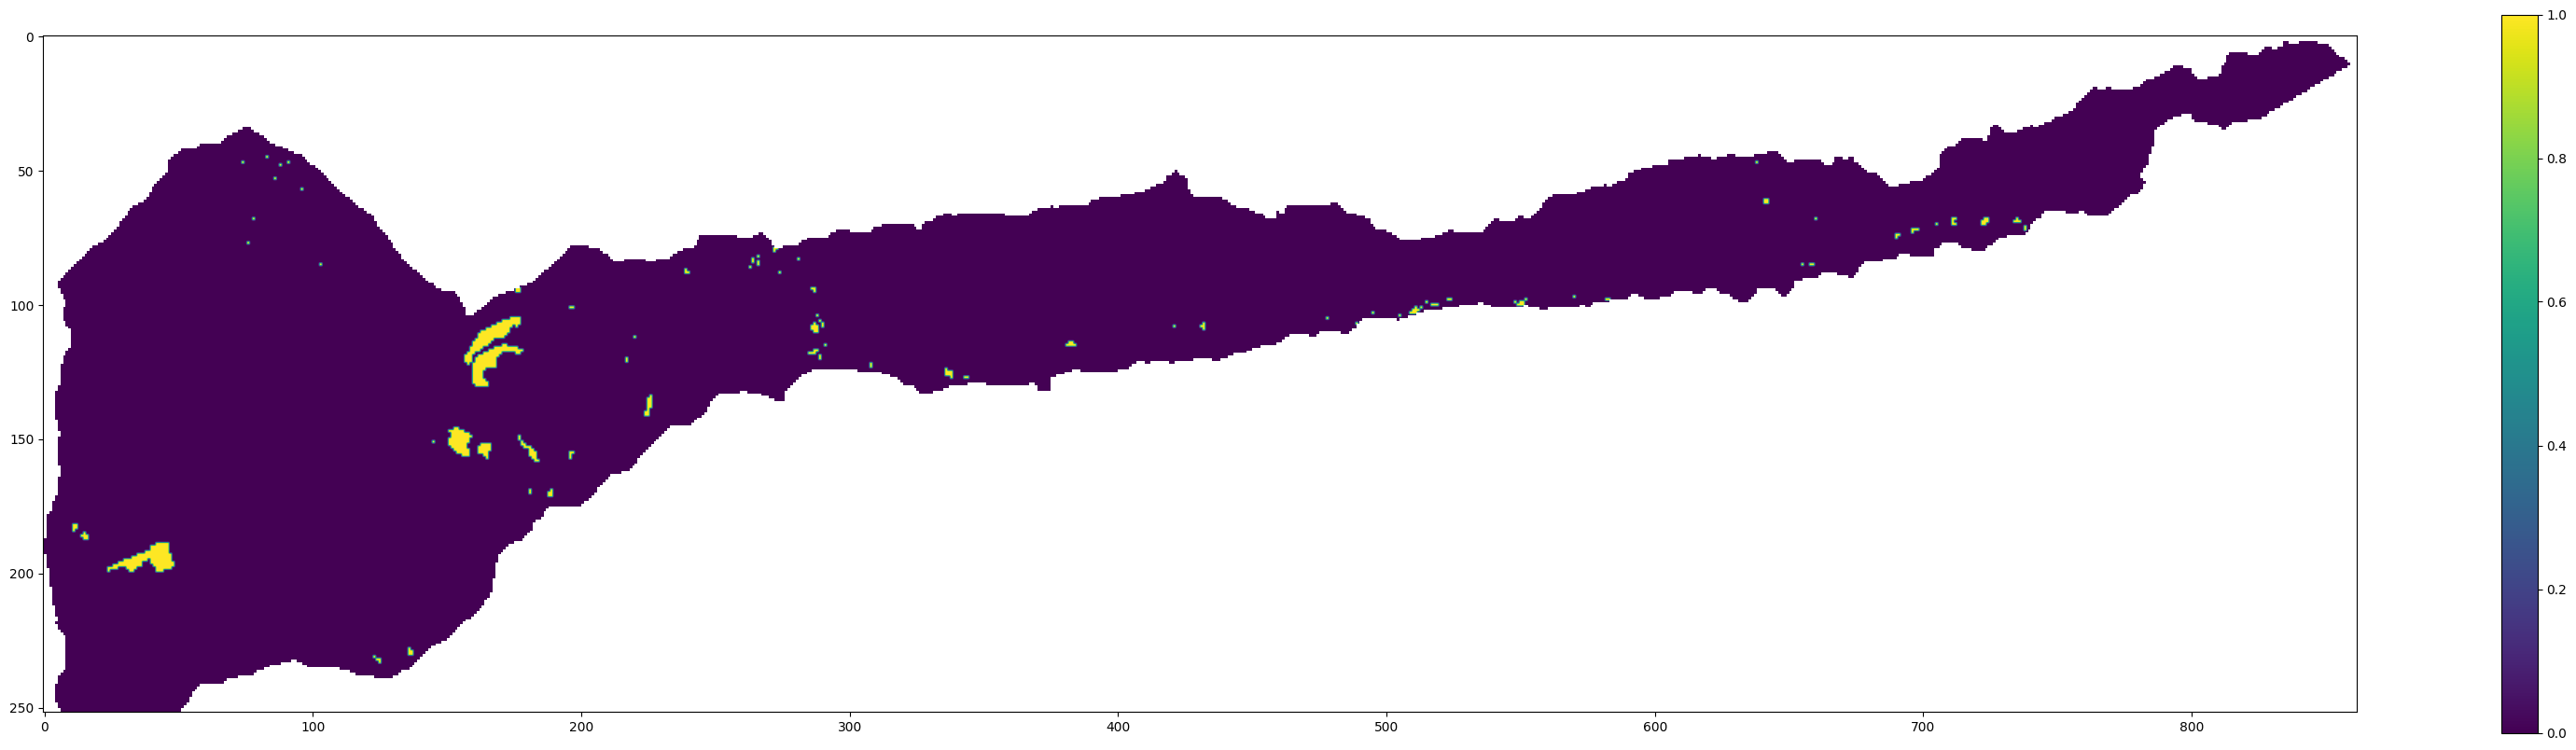

In [74]:
inventarioZona = inventarioB1 * cuencaB1

#inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioZona)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', inventarioZona.shape)
print('Valores únicos: ', np.unique(inventarioZona))

#plt.savefig('InventarioLectura.png', dpi=500, bbox_inches='tight')

Forma:  (252, 862)
Valores únicos:  [-1.000000e+00  0.000000e+00  9.690028e-03 ...  3.599896e+02  3.599927e+02
           nan]


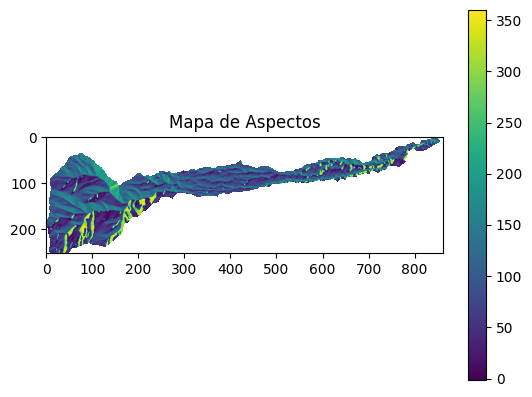

In [73]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AspectoRas2.tif?raw=true')
aspectos=raster.read(1)
aspectos=np.where(aspectos == aspectos.min(), np.nan, aspectos)
plt.imshow(aspectos)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Aspectos')
print('Forma: ', aspectos.shape)
print('Valores únicos: ', np.unique(aspectos))

Forma:  (252, 862)
Valores únicos:  [-59.04177  -51.092407 -49.6877   ...  23.87655   26.930264        nan]


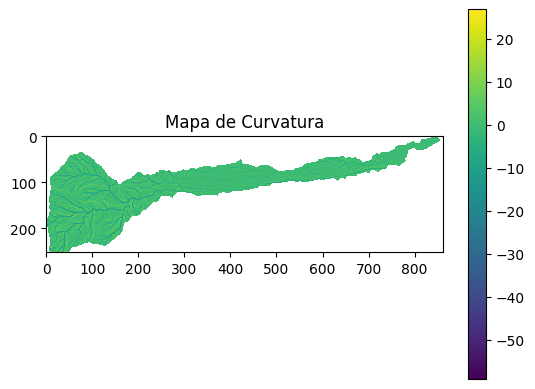

In [53]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/CurvaturaRas2.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura == curvatura.min(), np.nan, curvatura)
plt.imshow(curvatura)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Curvatura')
print('Forma: ', curvatura.shape)
print('Valores únicos: ', np.unique(curvatura))

Forma:  (252, 862)
Valores únicos:  [1582.284  1582.3328 1582.3752 ... 2934.0857 2934.192        nan]


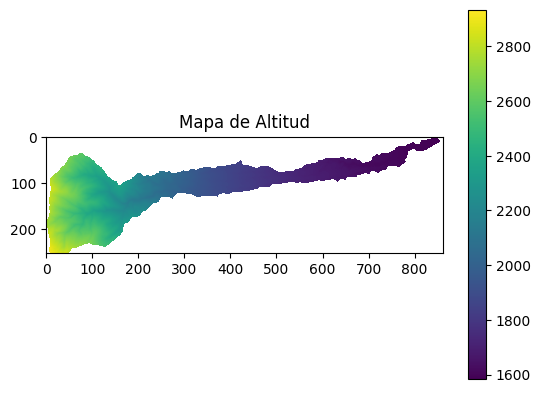

In [54]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AltitudRas2.tif?raw=true')
altitud=raster.read(1)
altitud=np.where(altitud == altitud.min(), np.nan, altitud)
plt.imshow(altitud)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Altitud')
print('Forma: ', altitud.shape)
print('Valores únicos: ', np.unique(altitud))

Forma:  (252, 862)
Valores únicos:  [ 1.  2.  3.  4.  5. nan]


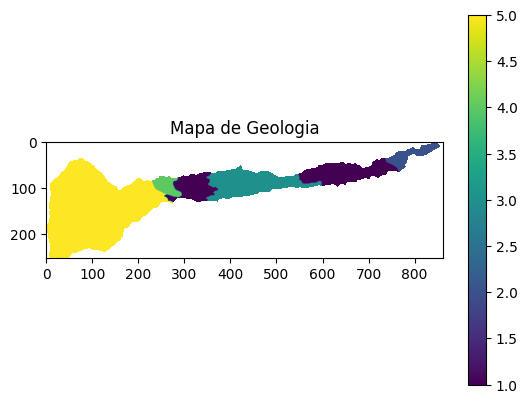

In [59]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/GeoRas2.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia == 255,np.nan,geologia)
geologia=np.where(geologia == geologia.min(), np.nan, geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Geologia')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (252, 862)
Valores únicos:  [ 0.  1.  2.  3.  4. nan]


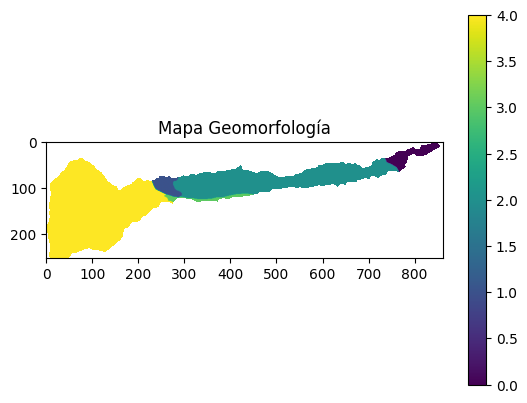

In [58]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/MorfoRas2.tif?raw=true')
geomorfo=raster.read(1)
geomorfo=np.where(geomorfo == 255,np.nan,geomorfo)
plt.imshow(geomorfo)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geomorfología')
print('Forma: ', geomorfo.shape)
print('Valores únicos: ', np.unique(geomorfo))

Forma:  (252, 862)
Valores únicos:  [0.0000000e+00 1.9843397e-03 3.8160379e-03 ... 6.2051132e+01 6.2054195e+01
           nan]


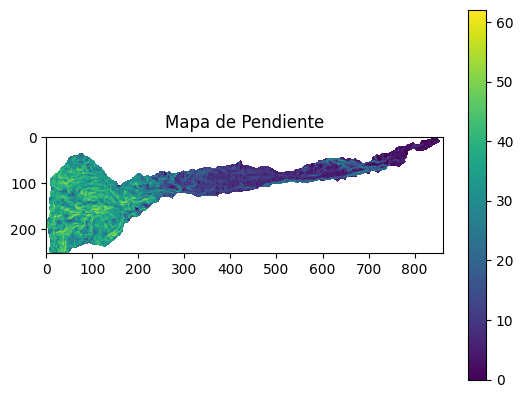

In [65]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/PendienteRas3.tif?raw=true')
slope=raster.read(1)
slope=np.where(slope == slope.min(), np.nan, slope)
plt.imshow(slope)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Pendiente')
print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))

In [75]:
#Convertimos matrices a vectores
inventariovector = inventarioZona.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

aspectosvector = aspectos.ravel()
print('Longitud aspectosvector: ', aspectosvector.shape[0])

curvaturavector = curvatura.ravel()
print('Longitud curvaturavector: ', curvaturavector.shape[0])

altitudvector = altitud.ravel()
print('Longitud altitudvector: ', altitudvector.shape[0])

geologiavector = geologia.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

geomorfovector = geomorfo.ravel()
print('Longitud geomorfovector: ', geomorfovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

#eliminamos los nans del vector
inventariovectorMenM = inventariovector[~np.isnan(inventariovector)]
print('Longitud inventariovectorMenM: ', inventariovectorMenM.shape[0])

aspectosvectorMenM = aspectosvector[~np.isnan(aspectosvector)]
print('Longitud aspectosvectorMenM: ', aspectosvectorMenM.shape[0])

curvaturavectorMenM = curvaturavector[~np.isnan(curvaturavector)]
print('Longitud curvaturavectorMenM: ', curvaturavectorMenM.shape[0])

altitudvectorMenM = altitudvector[~np.isnan(altitudvector)]
print('Longitud altitudvectorMenM: ', altitudvectorMenM.shape[0])

geologiavectorMenM = geologiavector[~np.isnan(geologiavector)]
print('Longitud geologiavectorMenM: ', geologiavectorMenM.shape[0])

geomorfovectorMenM = geomorfovector[~np.isnan(geomorfovector)]
print('Longitud geomorfovectorMenM: ', geomorfovectorMenM.shape[0])

slopevectorMenM = slopevector[~np.isnan(slopevector)]
print('Longitud slopevectorMenM: ', slopevectorMenM.shape[0])

#Realizamos el Dataframe

diccionario={'inventario':inventariovectorMenM, 'aspectos':aspectosvectorMenM, 'curvatura':curvaturavectorMenM,
               'altitud':altitudvectorMenM,'geologia':geologiavectorMenM,
               'geomorfologia':geomorfovectorMenM, 'pendiente':slopevectorMenM}

tablaDatos=pd.DataFrame(diccionario)
print(list(tablaDatos.columns))

tablaDatos.tail(5)

Longitud inventariovector:  217224
Longitud aspectosvector:  217224
Longitud curvaturavector:  217224
Longitud altitudvector:  217224
Longitud geologiavector:  217224
Longitud geomorfovector:  217224
Longitud slopevector:  217224
Longitud inventariovectorMenM:  63282
Longitud aspectosvectorMenM:  63282
Longitud curvaturavectorMenM:  63282
Longitud altitudvectorMenM:  63282
Longitud geologiavectorMenM:  63282
Longitud geomorfovectorMenM:  63282
Longitud slopevectorMenM:  63282
['inventario', 'aspectos', 'curvatura', 'altitud', 'geologia', 'geomorfologia', 'pendiente']


,inventario,aspectos,curvatura,altitud,geologia,geomorfologia,pendiente
63277,0.0,67.359482,-2.209582,2822.357666,5.0,4.0,33.464508
63278,0.0,31.936472,13.475179,2820.012939,5.0,4.0,28.379774
63279,0.0,33.755505,11.376484,2816.632080,5.0,4.0,27.254066
63280,0.0,37.180698,6.638794,2812.989258,5.0,4.0,21.701637
63281,0.0,28.403448,1.510018,2810.272217,5.0,4.0,15.197203
